<a href="https://colab.research.google.com/github/tina043c/ML/blob/master/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [0]:
DIR_OUT = './'
batch_size = 128
num_classes = 10
epochs = 20


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [98]:
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')



60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [100]:
model_name = 'CNN1'
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
# model.add(Dense(512,activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))
model.summary()



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)              

In [0]:
# # initiate RMSprop optimizer
# opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# # Let's train the model using RMSprop
# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])

# train_history= model.fit(x_train, y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_split=0.2,
#                     shuffle=True)

# score = model.evaluate(x_test, y_test, verbose=0)

# print('Test score:', score[0])
# print('Test accuracy:', score[1])


In [102]:



from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model

history = model.fit(x_test, y_test, validation_split=0.3, epochs=10, verbose=0)

train_history= model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    shuffle=True)



# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', loss)
print('Test accuracy:', accuracy)
print('Test f1_score:', f1_score)
print('Test precision:', precision)
print('Test recall:', recall)


Epoch 1/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0349 - accuracy: 0.9392 - f1_m: 0.9404 - precision_m: 0.9515 - recall_m: 0.9296 - val_loss: 0.0230 - val_accuracy: 0.9619 - val_f1_m: 0.9618 - val_precision_m: 0.9681 - val_recall_m: 0.9556
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0270 - accuracy: 0.9525 - f1_m: 0.9533 - precision_m: 0.9621 - recall_m: 0.9448 - val_loss: 0.0197 - val_accuracy: 0.9664 - val_f1_m: 0.9668 - val_precision_m: 0.9720 - val_recall_m: 0.9617
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0225 - accuracy: 0.9612 - f1_m: 0.9615 - precision_m: 0.9684 - recall_m: 0.9547 - val_loss: 0.0181 - val_accuracy: 0.9684 - val_f1_m: 0.9689 - val_precision_m: 0.9728 - val_recall_m: 0.9651
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0190 - accuracy: 0.9678 - f1_m: 0.9683 - precision_m: 0.9734 - recall_m: 0.9632 - val_loss: 0.0169 - val_accuracy: 0.9718 - va

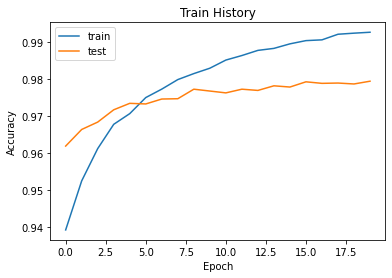

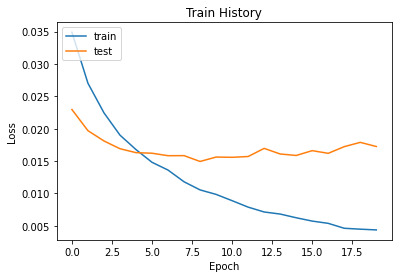

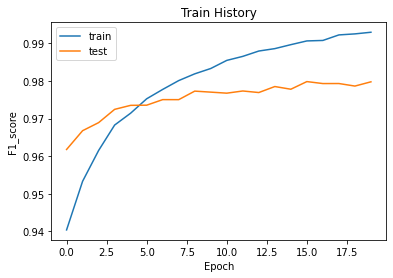

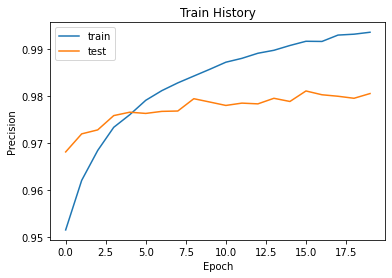

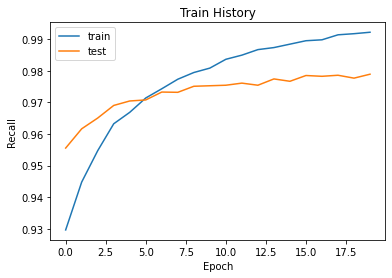

In [103]:
import numpy as np
import matplotlib.pyplot as plt

def show_train_history(train_type, test_type):
# Get training and test loss histories
    plt.plot(train_history.history[train_type]) 
    plt.plot(train_history.history[test_type])
    plt.title('Train History')
    if train_type == 'accuracy':
        plt.ylabel('Accuracy')
    elif train_type == 'loss':
        plt.ylabel('Loss')
    elif train_type == 'f1_m':
        plt.ylabel('F1_score')
    elif train_type == 'precision_m':
        plt.ylabel('Precision')
    else:
        plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc='upper left')
    plt.show()
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')
show_train_history('f1_m','val_f1_m')
show_train_history('precision_m','val_precision_m')
show_train_history('recall_m','val_recall_m')




In [0]:
# Save Keras model
def savemodel(model, model_params_dir,name):
    json_string = model.to_json()
    # Save model architecture in JSON file
    open(model_params_dir + name + '_arch.json', 'w').write(json_string)
    # Save weights as HDF5
    model.save_weights(model_params_dir + name + '_weights.h5')
    print("Saved model to disk")

In [105]:
savemodel(model, DIR_OUT, model_name)

Saved model to disk


In [0]:
# Load Keras model
def loadmodel(model_params_dir,name): 
    # Load model architecture from JSON file
    model = keras.models.model_from_json(open(model_params_dir + name + '_arch.json').read())
    # Load model weights from HDF5 file
    model.load_weights(model_params_dir + name + '_weights.h5')
    print("Loaded model from disk")
    return model

In [0]:
# Load weights only
def loadmodelweights(model,model_params_dir,name_weightfile): 
    # Load model weights from HDF5 file
    model.load_weights(model_params_dir + name_weightfile+'.h5')
    print("Loaded model weights from disk")
    return model

In [108]:
loadmodelweights(model, DIR_OUT, model_name + '_weights')

Loaded model weights from disk
